c:\python35-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


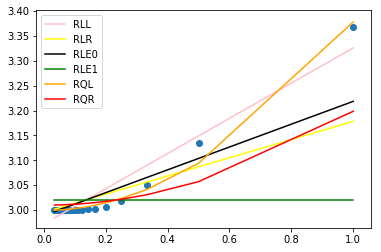

c:\python35-32\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,F-value,Kurtosis,Mean,Median,Model,R-squared,STD,Skew,p-value
0,3576387939382425,11.590914,3.020068,2.995279,RLL,0.791318,0.068073,3.353529,3.420946e-192
1,4676814997653950,11.590914,3.020068,3.007256,RLR,0.809680,0.035185,3.353529,9.147893e-194
2,121597189939003360,20.455464,3.020068,3.000690,RQL,1.000000,0.070153,4.610368,7.230709e-213
3,-12159718993900366,20.455464,3.020068,3.010414,RQR,1.000000,0.034950,4.610368,1.000000e+00


In [27]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from scipy import stats

a=np.arange(1,30) 
A=a[:,np.newaxis]

y=np.exp(-A)+3
plt.scatter((1/A),y)
#linear,quadratic
p=(1/A)
q=1/(A**2)

#Regression models
R=LinearRegression()
R1=Ridge()
R2=ElasticNet(alpha=0.02,l1_ratio=0)
R3=ElasticNet(alpha=0.02,l1_ratio=1)
#Reciprocal-Linear model(LinearRegression)
R.fit(p,y)
y1=R.predict(p)
plt.plot(p,y1,'pink',label='RLL')

#Reciprocal-Linear model(Ridge)
R1.fit(p,y)
y2=R1.predict(p)
plt.plot(p,y2,'yellow',label='RLR')
#Reciprocal-linear_model-Elasticnet l1-ratio=0

R2.fit(p,y)
y5=R2.predict(p)
plt.plot(p,y5,'black',label='RLE0')
#Reciprocal-linear_model-Elasticnet l1-ratio=1

R3.fit(p,y)
y6=R3.predict(p)
plt.plot(p,y6,'green',label='RLE1')

#Reciprocal quadratic model -linear regression
R.fit(q,y)
y3=R.predict(q)
plt.plot(p,y3,'orange',label='RQL')

#Reciprocal quadratic model -Ridge
R1.fit(q,y)
y4=R1.predict(q)
plt.plot(p,y4,'red',label='RQR')
plt.legend()
plt.show()

#Summary Table
#RLL=Reciprocal-Linear-Linear Regression
#RLR=Reciprocal-Linear-Linear Ridge
#RQL=Reciprocal-Quadratic-Linear Regression
#RQR=Reciprocal-Quadratic-Ridge


#F-Rregression
m1=f_regression(p,y1)
m2=f_regression(p,y2)
m3=f_regression(q,y3)
m4=f_regression(q,y4)

F1=int(m1[0])
P1=float(m1[1])

F2=int(m2[0])
P2=float(m2[1])

F3=int(m3[0])
P3=float(m3[1])

F4=int(m4[0])
P4=float(m4[1])

#Skewness of predictive outputs

S1=float(stats.skew(y1))
S2=float(stats.skew(y2))
S3=float(stats.skew(y3))
S4=float(stats.skew(y4))

#Kurtosis of predictive outputs

K1=float(stats.kurtosis(y1))
K2=float(stats.kurtosis(y2))
K3=float(stats.kurtosis(y3))
K4=float(stats.kurtosis(y4))







model=pd.DataFrame({'Model':['RLL','RLR','RQL','RQR'],'R-squared':[R.score(p,y1), R1.score(p,y2),R.score(q,y3),R1.score(q,y4)]
                    ,'STD':[np.std(y1),np.std(y2),np.std(y3),np.std(y4)],'F-value':[F1,F2,F3,F4],'p-value':[P1,P2,P3,P4],
                    'Mean':[np.mean(y1),np.mean(y2),np.mean(y3),np.mean(y4)],'Median':[np.median(y1),np.median(y2),
                                                                                       np.median(y3),np.median(y4)],
                    'Skew':[S1,S2,S3,S4],'Kurtosis':[K1,K2,K3,K4]
                    
                    
    
})

model





































